# BENFORD’S LAW ANALYSIS ON TWITTER DATA

## Team Members
**Member 1 :**
Geethika,
**Email-ID :**
giddalur.jaya@adypu.edu.in

**Member 2 :**
Shriti Negi,
**Email-ID :**
shriti.negi@adypu.edu.in

**Member 3 :**
Sayuri Janbandhu,
**Email-ID :**
sayuri.janbandhu@adypu.edu.in

**Member 4 :**
Devaansh Kathuria,
**Email-ID :**
devaansh.kathuria@adypu.edu.in

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 Analyzing Benford’s Law for column: id
Chi-square: 27.71 | p-value: 0.0005

 Analyzing Benford’s Law for column: followersCount
Chi-square: 25.48 | p-value: 0.0013

 Analyzing Benford’s Law for column: friendsCount
Chi-square: 23.32 | p-value: 0.0030


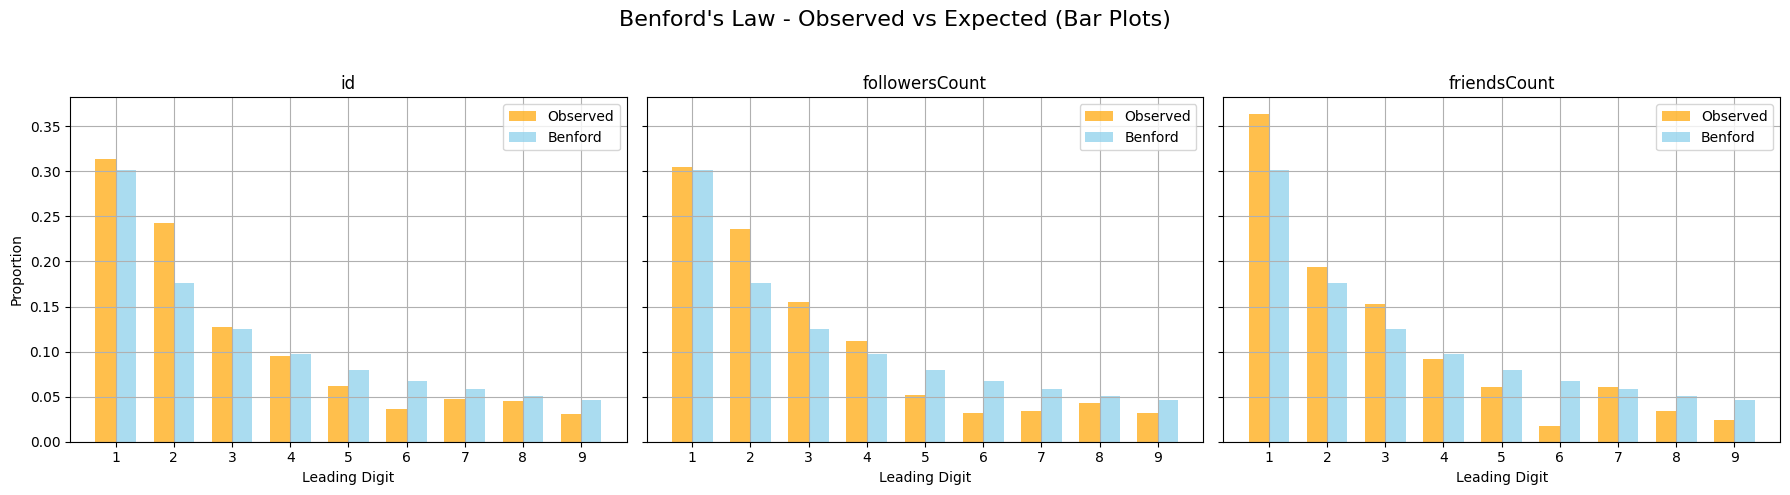

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

file_path = '/content/drive/My Drive/maths_ai_project/twitter_data.csv'
df = pd.read_csv(file_path, on_bad_lines='skip')

# Defining the columns to be analyzed
columns_to_test = ['id', 'followersCount', 'friendsCount']

# Extracting the first non-zero digit
def extract_first_digit(value):
    try:
        value_str = str(value).lstrip('0').replace(".", "").replace(",", "").strip()
        for ch in value_str:
            if ch.isdigit() and ch != '0':
                return int(ch)
    except:
        return None
    return None

# Setting up subplots
fig, axes = plt.subplots(1, len(columns_to_test), figsize=(18, 5), sharey=True)

# Loop through each column and plot
for idx, column in enumerate(columns_to_test):
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame.")
        continue

    print(f"\n Analyzing Benford’s Law for column: {column}")

    # Extract first digits
    digits_series = df[column].dropna().apply(extract_first_digit).dropna().astype(int)

    if digits_series.empty:
        print(f"No valid digits found in column: {column}")
        continue

    # Frequency analysis
    observed_counts = [digits_series.tolist().count(d) for d in range(1, 10)]
    total = sum(observed_counts)
    expected_counts = [total * np.log10(1 + 1/d) for d in range(1, 10)]

    # Chi-square test
    chi2, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
    print(f"Chi-square: {chi2:.2f} | p-value: {p_value:.4f}")

    # Plotting
    observed_pct = [count / total for count in observed_counts]
    expected_pct = [count / total for count in expected_counts]
    x = np.arange(1, 10)

    ax = axes[idx]
    ax.bar(x - 0.175, observed_pct, width=0.35, label='Observed', alpha=0.7, color='orange')
    ax.bar(x + 0.175, expected_pct, width=0.35, label='Benford', alpha=0.7, color='skyblue')
    ax.set_title(column)
    ax.set_xticks(x)
    ax.set_xlabel("Leading Digit")
    if idx == 0:
        ax.set_ylabel("Proportion")
    ax.grid(True)
    ax.legend()

# Final plot adjustments
plt.suptitle("Benford's Law - Observed vs Expected (Bar Plots)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 Analyzing Benford’s Law for column: id
Chi-square: 27.71, P-value: 0.0005

 Analyzing Benford’s Law for column: followersCount
Chi-square: 25.48, P-value: 0.0013

 Analyzing Benford’s Law for column: friendsCount
Chi-square: 23.32, P-value: 0.0030


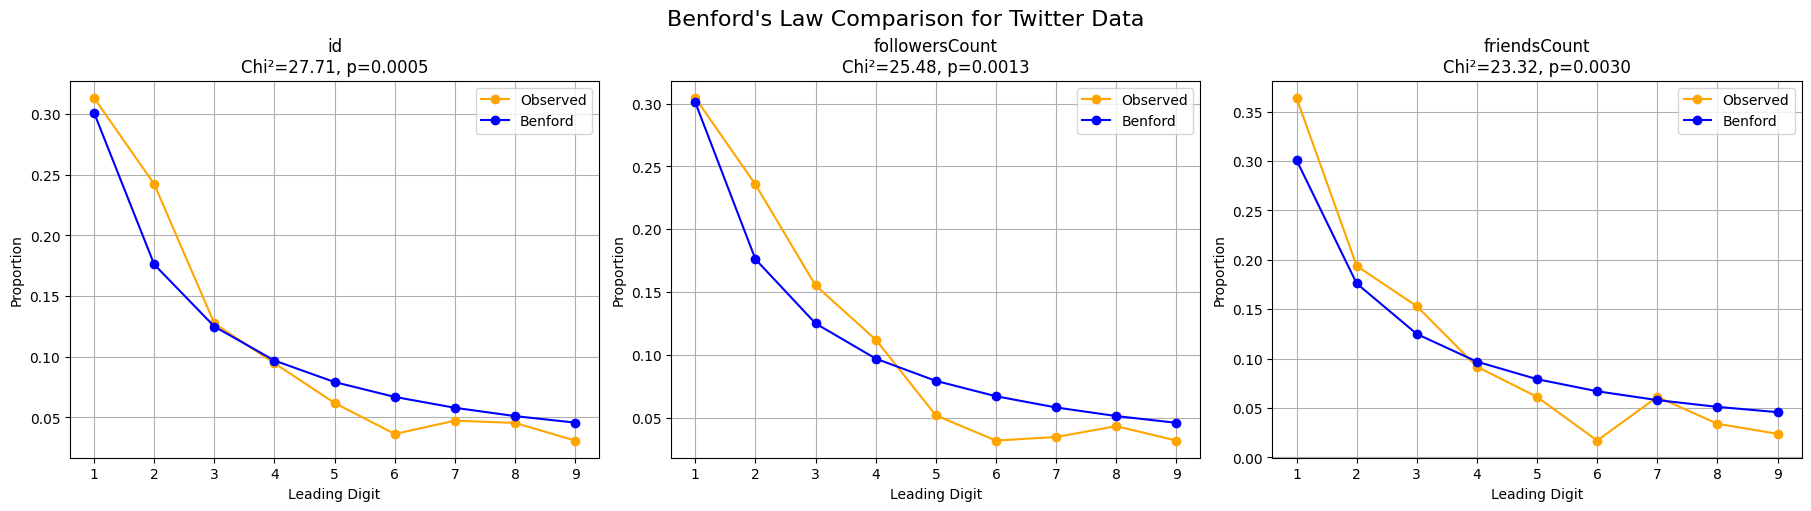

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

file_path = '/content/drive/My Drive/maths_ai_project/twitter_data.csv'
df = pd.read_csv(file_path, on_bad_lines='skip')

# Columns to be analyzed
columns_to_test = ['id', 'followersCount', 'friendsCount']

# Function to extract leading digit
def extract_first_digit(value):
    try:
        value_str = str(value).lstrip('0').replace(".", "").replace(",", "").strip()
        for ch in value_str:
            if ch.isdigit() and ch != '0':
                return int(ch)
    except:
        return None
    return None

# Creating subplots
num_cols = len(columns_to_test)
fig, axes = plt.subplots(1, num_cols, figsize=(6 * num_cols, 5), constrained_layout=True)

for i, column in enumerate(columns_to_test):
    ax = axes[i] if num_cols > 1 else axes

    if column not in df.columns:
        print(f"Column '{column}' not found.")
        ax.set_title(f"{column} (Not Found)")
        continue

    print(f"\n Analyzing Benford’s Law for column: {column}")

    digits_series = df[column].dropna().apply(extract_first_digit).dropna().astype(int)

    if digits_series.empty:
        print(f"No valid digits in column: {column}")
        ax.set_title(f"{column} (No Valid Digits)")
        continue

    observed_counts = [digits_series.tolist().count(d) for d in range(1, 10)]
    total = sum(observed_counts)
    expected_counts = [total * np.log10(1 + 1/d) for d in range(1, 10)]

    chi2, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
    print(f"Chi-square: {chi2:.2f}, P-value: {p_value:.4f}")

    observed_pct = [count / total for count in observed_counts]
    expected_pct = [count / total for count in expected_counts]

    ax.plot(range(1, 10), observed_pct, marker='o', label='Observed', color='orange')
    ax.plot(range(1, 10), expected_pct, marker='o', label='Benford', color='blue')
    ax.set_title(f"{column}\nChi²={chi2:.2f}, p={p_value:.4f}")
    ax.set_xlabel("Leading Digit")
    ax.set_ylabel("Proportion")
    ax.set_xticks(range(1, 10))
    ax.grid(True)
    ax.legend()

plt.suptitle("Benford's Law Comparison for Twitter Data", fontsize=16)
plt.show()

# **Contributors**

**Geethika** :- Coding and Editing

**Sayuri Janbandhu** :- Analysis and Content

**Devaaansh Kathuria** :- Debug and Editing

**Shriti Negi** :- Coding and Design
